# Tutorial #1
## Calculando integrales propias.
$$\int_a^b f(x) \, dx$$

In [ ]:
from platform import python_version

print(python_version())

In [1]:
# definimos la funcion que deseamos integrar.
def f(x):
    return x

# usamos scipy para realizar aproximacion numerica.
import scipy.integrate as newton

I, epsilon = newton.quad(f, 0, 1)

print('Valor de la integral {} con error {}'.format(I, epsilon))

Valor de la integral 0.5 con error 5.551115123125783e-15


Ejemplo:
Calcular $\int_{-3}^3 f(x) \, dx$ para:
$$f(x) = \begin{cases} -x & x < 0 \\ x^2 & x \geq 0 \end{cases} $$

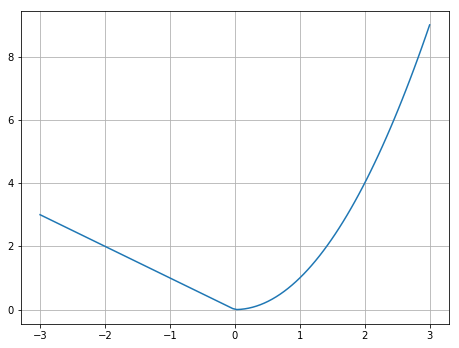

In [4]:
# probamos con una funcion definida por partes

def f(x):
    if x < 0:
        return -x
    else:
        return x**2

import matplotlib.pyplot as plt 
import numpy as np

zoom = 1.2
w, h = 6.4 * zoom, 4.8 * zoom
plt.rcParams["figure.figsize"] = (w, h)

xx = np.linspace(-3, 3, 100)
ff = np.vectorize(f)
yy = ff(xx)

plt.plot(xx, yy)
plt.grid()
plt.show()

In [5]:
# valor de la integral

I, epsilon = newton.quad(f, -3, 3)
print('Valor de la integral {} con error {}'.format(I, epsilon))


Valor de la integral 13.500000000000002 con error 1.4921397450962104e-13


# Calculando coeficientes de Fourier

Observe que el argumento que recibe la funciÃ³n quad es una funciÃ³n, i.e. recibe una variable real $x$ y devuelve un valor $x$. Debemos tener especial cuidado con integrar expresiones del tipo:
$$ \int_{-L}^L f(x) \, \sin \left( \frac{\pi \, n \, x}{L} \right) \, dx $$

Calcularemos los coeficientes de Fourier para la funciÃ³n:
$$ f(x) = \begin{cases} -x & -2 \leq x < 0 \\ x & 0 \leq x < 2 \end{cases} \qquad f(x + 4) = f(x)$$.

# Iniciamos por definir la funcion.

## Task1:
Utilice lo visto en clase para definir la funciÃ³n para todo x.
Verifique que su resultado es correcto desplegando una gr[afica de la funci[on]].


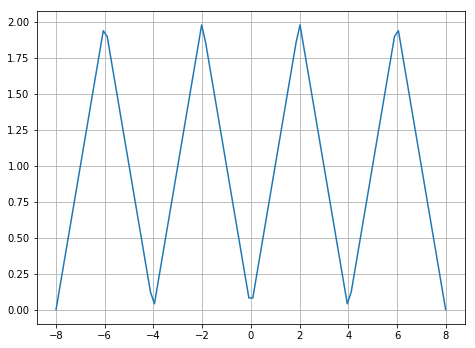

In [7]:

### Sol:

def f(x):
    r = x % 4.0
    if r >= 2:
        return 4 - r
    else:
        return r

xx = np.linspace(-8, 8, 100)
ff = np.vectorize(f)
yy = ff(xx)

plt.plot(xx, yy)
plt.grid()
plt.show()

In [8]:
# Definimos parametros
L = 2
n = 1

In [31]:
# Note como esto no funciona

I, epsilon = newton.quad(f(x)*np.cos(np.pi*n*x/L), -L, L)

NameError: name 'x' is not defined

In [32]:
# Debemos construir una funcion que haga lo que necesitamos.
# Podemos usar una funcion explicita.

def integrand(x):
    return f(x)*np.cos(np.pi*n*x/L)

I, epsilon = newton.quad(integrand, -L, L)
print('Valor de la integral {} con error {}'.format(I, epsilon))

Valor de la integral -3.2422778765548084 con error 4.154838189397905e-14


In [33]:
# Podemos usar una funcion lambda

integrand = lambda x: f(x)*np.cos(np.pi*n*x/L)
I, epsilon = newton.quad( integrand, -L, L )
print('Valor de la integral {} con error {}'.format(I, epsilon))

Valor de la integral -3.2422778765548084 con error 4.154838189397905e-14


In [34]:
# Podemos iterar sobre n para obtener todos los coeficientes que deseamos
N = 10 # Maximo numero de coeficientes.
for n in range(1, N+1):
    
    def integrand(x):
        return f(x)*np.cos(np.pi*n*x/L)
    
    I, epsilon = newton.quad(integrand, -L , L)
    print('a_{} = {} con error {}'.format(n, 1/L*I, epsilon))

a_1 = -1.6211389382774042 con error 4.154838189397905e-14
a_2 = 0.4052847345693511 con error 3.885505798112047e-14
a_3 = -0.1801265486974893 con error 1.4657544275542556e-11
a_4 = 0.10132118364233797 con error 3.8149184434411023e-14
a_5 = -0.06484555753109597 con error 4.256253061449408e-14
a_6 = 0.04503163717437149 con error 5.459860970453978e-12
a_7 = -0.03308446812810982 con error 4.2004428407738104e-10
a_8 = 0.025330295910583008 con error 6.744061496755105e-09
a_9 = -0.02001406096638743 con error 1.0878521942508222e-09
a_10 = 0.01621138938277388 con error 3.892330766084548e-14


## Task 2
Despliegue las graficas del polinomio de Fourier de orden N y la funcion original.
Estime la norma del error:
$$ \left\| f(x) - a_0 - a_1 \cos \omega_1 \, x - a_2 \cos \omega_2 \, x - \cdots - a_N \cos \omega_N \,x \right\|^2$$


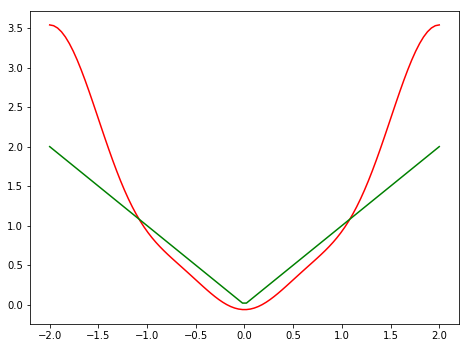

In [37]:
# sol.
# podemos usar un arreglo diferente para hacerlos mas claro.

N = 3

# Empezamos por a_0

I, epsilon = newton.quad(f, -L, L)
a_0 = 1.0/(2*L)*I

def integrand(n, L, f):
    return lambda x: f(x)*np.cos(n*np.pi*x/L)

coeficientes = [ 1/L*newton.quad(integrand(k, L, f), -L, L)[0] for k in range(1, N+1) ]

xx = np.linspace(-L, L, 100)

f_hat = lambda x: a_0 + sum([coeficientes[k]*np.cos(np.pi*(k+1)*x/L) for k in range(N)] )

ff_hat = np.vectorize(f_hat)

yy = ff_hat(xx)

yy1 = ff(xx)

plt.plot(xx, yy, color='red')
plt.plot(xx, yy1, color='green')

In [38]:
# Estimacion del error

delta2 = lambda x: (f(x) - f_hat(x))**2

I, epsilon = newton.quad(delta2, -L, L)

print('Error: {}'.format(np.sqrt(I)))

Error: 0.198250839214548


## Tarea:

Construya una funciÃ³n o procedimiento:

Input: $N$, $L$, $f$ (funcion) periodica con periodo $L$.
Output: $a_0$, $a_1, \dots , a_N$, $b_1, \dots, b_n$.

Construya un procedimiento que realice lo siguiente:
Input: $N$, $L$, $f$ (funciÃ³n) periodica con periodo $L$.
Output: Graficas del polinomio trigonometrico $\hat{f}_N$ y $f$ en el intervalo $[-3L, 4L]$ y despliegue el error de aproximaciÃ³n.

In [68]:
#
 #Funcion que lo que hace es Calcular el A_0
 #Recibe com parametros (L,f)
 #Retornara el A_0 de la funcion
#
def calcular_a0(f, L):
    integral = lambda x: f(x)
    
    I, _ = newton.quad( integral, -L, L )
    a_0 = (1/(2*L))*I
    return a_0

In [69]:
#
 #Funcion que lo que hace es Calcular el A_N
 #Recibe como parametros f,L,n
 #Retornara el A_n de la funcion
#
def calcular_an(f, L, n):
    integral = lambda x: f(x)*np.cos( (np.pi * n * x) / L)
    
    I, _ = newton.quad(integral, -L , L)
    a_n = (1/L)*I
    return a_n 

In [70]:
#
 #Funcion que lo que hace es Calcular el B_N
 #Recibe como parametros (n, L, f)
 #Retornara el B_n de la funcion
#
def calcular_bn(f, L, n):
    integrando = lambda x: f(x)*np.sin( (np.pi * n * x) / L)
    
    I, _ = newton.quad(integrando, -L , L)
    b_n = (1/L)*I
    return b_n

In [91]:
#
 #Funcion que lo que hace es Calcular el B_N
 #Recibe como parametros (N, L, f)
 #Retornara el B_n de la funcion
#

def S_N(f, L, N):
    
    a_0 = calcular_a0(f,L)
    
    a_n = [calcular_an(f, L, i) for i in range (1, N+1)]
    
    b_n = [calcular_bn(f, L, i) for i in range (1, N+1)]
    
    sumatoria = lambda x: a_0 + sum([a_n[i-1]*np.cos(i*np.pi*x / L)  + b_n[i-1]*np.sin(i*np.pi*x / L) for i in range(1, N + 1)])
    
    return sumatoria

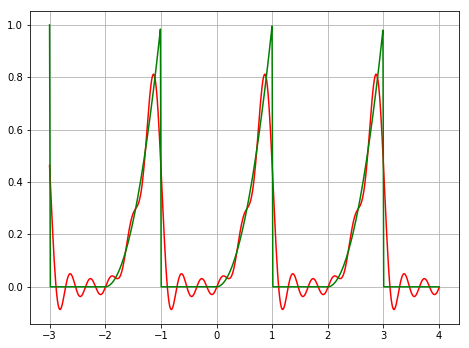

In [92]:
def graficarFuncion(f, L, N):
    
    f_hat = S_N(f,L,N)
    
    dominioF = np.linspace(-3*L, 4*L, 500)
    f_hat_vectorizada = np.vectorize(f_hat)
    y_serie = f_hat_vectorizada(dominioF)
    
    def f_periodica(x):
        T = 2*L
        g = lambda x: f(x) if 0 < x <= L else f(x-T) 
        r = x % T
        return g(r)
    
    f_vectorizada = np.vectorize(f_periodica)
    y = f_vectorizada(dominioF)
    
    plt.plot(dominioF, y_serie, color='red')
    plt.plot(dominioF, y, color='green')

    plt.grid()
    plt.show()

L = 1
N = 5
graficarFuncion(f, L, N)